In [1]:
import xtrack as xt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import xpart as xp
import yaml
import matplotlib.patches as patches

In this example we will look at the `survey` of the collider.
The survey represents the physical position of the elements in the collider in the laboratory frame.
We set the origin of the survey at the IP1.

First of all we need to load our collider. 
This is a json file that contains all the information on the collider.
Namely it contains the two lines `lhcb1` and `lhcb2` corresponding to the two beams.

In [2]:
collider = xt.Multiline.from_json('../data/collider.json')
collider.build_trackers()
my_dict = collider.lhcb1.to_dict()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


Now we want to call the `survey` method, two things are important:
- We want to set the starting point at IP1;
- In the MAD-X fashion b2 has a different reference frame w.r.t. b1. 
To be able to plot the two together we need to `reverse` the survey of the b2. 

In [3]:
survey_b1 = collider['lhcb1'].survey(element0='ip1')
survey_b2 = collider['lhcb2'].survey(element0='ip1').reverse()

Let's look at the `HL-LHC` machine, in the plot you can notice:
- The `ARCs` in green, these are the regions where the FODO cells are responsible for curving and focusing the beam;
- The `Dispersion Suppression` regions in violet, to remove the dispersion caused by the preceeding section;
- The `Straigh Sections` in red, the regions of the tunnel where the total dipolar contribution is zero;
- The 4 `IPs` in red, those with a shared vacuum pipe (i.e. the ones where the bunches collide and the experiments are built):
    - `IP1` : ATLAS experiment;
    - `IP2` : ALICE experiment;
    - `IP5` : CMS experiment;
    - `IP8` : LHCb experiment;
- The 4 `IPs` in black, the regions where the two bunches do not collide :
    - `IP3` : Momentum cleaning;
    - `IP4` : RF and Beam Instrumentation;
    - `IP6` : Beam dumping system;
    - `IP7` : Betatron cleaning;
Now we want to plot the survey of the two beams together.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


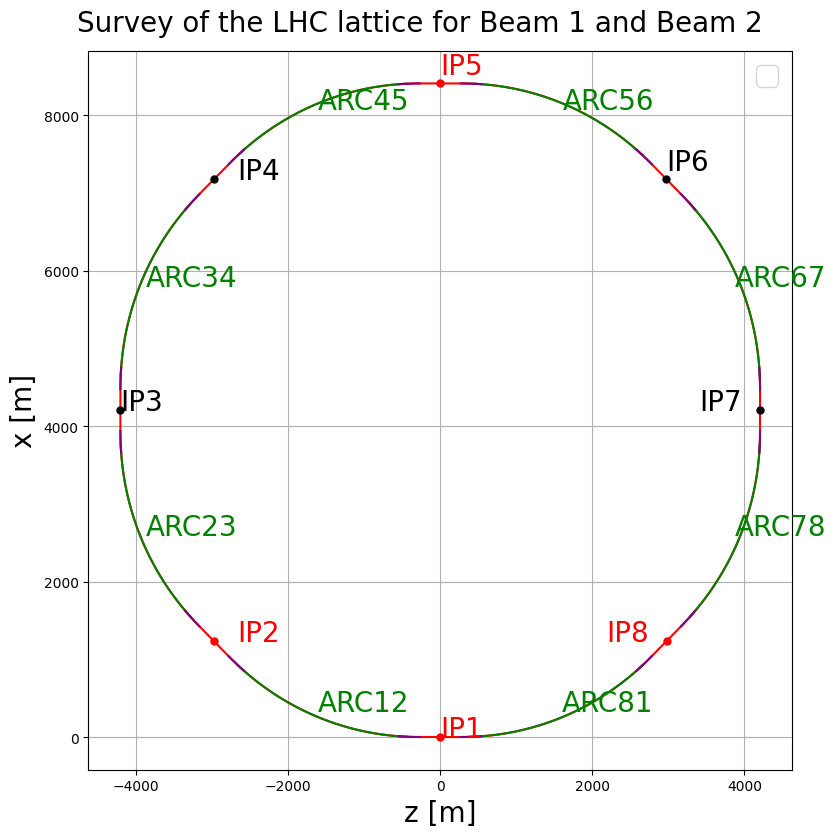

In [4]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8.5, 8.5)
fontsize = 20
fig.suptitle('Survey of the LHC lattice for Beam 1 and Beam 2',fontsize = fontsize )
ax.plot(-survey_b1['Z'],-survey_b1['X'], color='red')  
ip_links = ['12','23','34','45','56','67','78','81']
for ii in ip_links:
    ax.plot(-survey_b1.rows['s.arc.'+ii+'.b1':'e.arc.'+ii+'.b1', ]['Z'],
            -survey_b1.rows['s.arc.'+ii+'.b1':'e.arc.'+ii+'.b1', ]['X'],
            color='green')
    ax.text(-survey_b1.rows['s.arc.'+ii+'.b1':'e.arc.'+ii+'.b1', ]['Z'].mean(),
            -survey_b1.rows['s.arc.'+ii+'.b1':'e.arc.'+ii+'.b1', ]['X'].mean(),
           'ARC'+ii, fontsize=fontsize, color='green')
    
r_ip = ['r1','r2','r3','r4','r5','r6','r7','r8']
l_ip = ['l1','l2','l3','l4','l5','l6','l7','l8']
for ii in r_ip:
    ax.plot(-survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['Z'],
           -survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['X'],
           color='purple')

for ii in l_ip:
    ax.plot(-survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['Z'],
            -survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['X'],
            color='purple')

ax.plot(-survey_b1.rows['ip1']['Z'],-survey_b1.rows['ip1']['X'],  'o', markersize=5, color='red')
ax.text(-survey_b1.rows['ip1']['Z'],-survey_b1.rows['ip1']['X'], 'IP1', fontsize=fontsize, color='red')
ax.plot(-survey_b1.rows['ip2']['Z'],-survey_b1.rows['ip2']['X'],  'o', markersize=5, color='red')
ax.text(-survey_b1.rows['ip2']['Z']+300,-survey_b1.rows['ip2']['X'], 'IP2', fontsize=fontsize, color='red')
ax.plot(-survey_b1.rows['ip5']['Z'],-survey_b1.rows['ip5']['X'],  'o', markersize=5, color='red')
ax.text(-survey_b1.rows['ip5']['Z'],-survey_b1.rows['ip5']['X']+120, 'IP5', fontsize=fontsize, color='red')
ax.plot(-survey_b1.rows['ip8']['Z'],-survey_b1.rows['ip8']['X'],  'o', markersize=5, color='red')
ax.text(-survey_b1.rows['ip8']['Z']-800,-survey_b1.rows['ip8']['X'], 'IP8', fontsize=fontsize, color='red')
ax.plot(-survey_b1.rows['ip3']['Z'],-survey_b1.rows['ip3']['X'],  'o', markersize=5, color='black')
ax.text(-survey_b1.rows['ip3']['Z'],-survey_b1.rows['ip3']['X'], 'IP3', fontsize=fontsize, color='black')
ax.plot(-survey_b1.rows['ip4']['Z'],-survey_b1.rows['ip4']['X'],  'o', markersize=5, color='black')
ax.text(-survey_b1.rows['ip4']['Z']+300,-survey_b1.rows['ip4']['X'], 'IP4', fontsize=fontsize, color='black')
ax.plot(-survey_b1.rows['ip6']['Z'],-survey_b1.rows['ip6']['X'],  'o', markersize=5, color='black')
ax.text(-survey_b1.rows['ip6']['Z'],-survey_b1.rows['ip6']['X']+120, 'IP6', fontsize=fontsize, color='black')
ax.plot(-survey_b1.rows['ip7']['Z'],-survey_b1.rows['ip7']['X'],  'o', markersize=5, color='black')
ax.text(-survey_b1.rows['ip7']['Z']-800,-survey_b1.rows['ip7']['X'], 'IP7', fontsize=fontsize, color='black')
  
ax.set_xlabel('z [m]', fontsize = fontsize)
ax.set_ylabel('x [m]', fontsize = fontsize)
ax.grid()
plt.legend(fontsize = fontsize)
plt.tight_layout()

Let's zoom into IP3, a non colliding IP. We can see how the two beam pipes are well separated.
Notice: we call `Straight Section` something that is not strictly straight, since we have the 'doglegs'.
What we mean by 'Straight' is a total dipolar contribution equal to zero in that section.

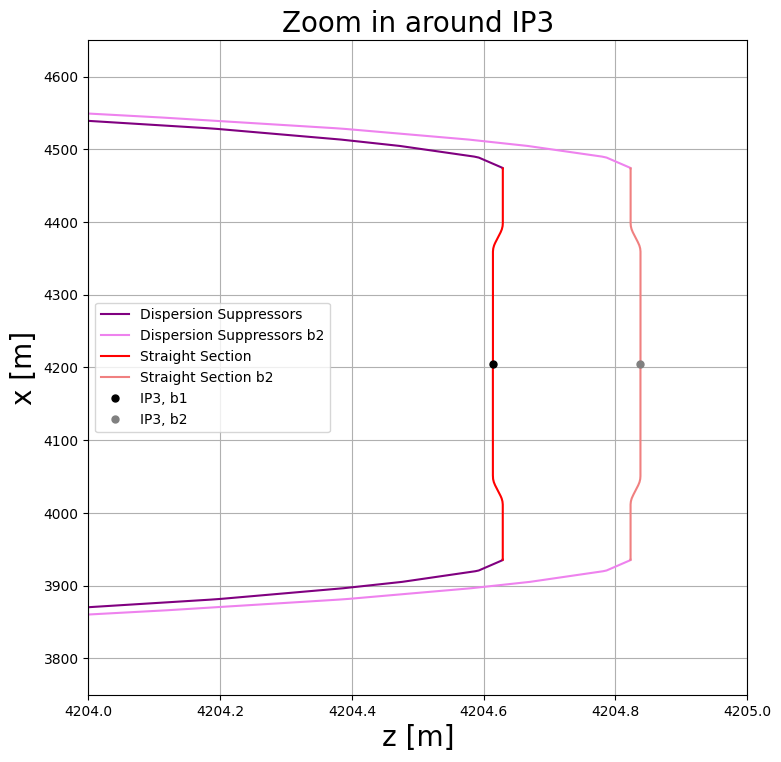

In [5]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8.5, 8.5)
fontsize = 20
#-----------------b1-----------------
ii = 'r3'
ax.plot(survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['Z'],
        -survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['X'],
        color='purple', label='Dispersion Suppressors')
ax.plot(survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['Z'],
        -survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['X'],
        color='violet', label='Dispersion Suppressors b2')

ii = 'l3'
ax.plot(survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['Z'],
        -survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['X'],
        color='purple')
ax.plot(survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['Z'],
        -survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['X'],
        color='violet')
ax.plot(survey_b1.rows['ip3':'s.ds.'+'r3'+'.b1', ]['Z'],
        -survey_b1.rows['ip3':'s.ds.'+'r3'+'.b1', ]['X'],
        color='red', label='Straight Section')
ax.plot(survey_b1.rows['e.ds.'+'l3'+'.b1':, ]['Z'],
        -survey_b1.rows['e.ds.'+'l3'+'.b1':, ]['X'],
        color='red')
ii = 'r3'
ax.plot(survey_b2.rows[:'e.ds.'+ii+'.b2', ]['Z'][0:175],
        -survey_b2.rows[:'e.ds.'+ii+'.b2', ]['X'][0:175],
        color='lightcoral', label='Straight Section b2')
ax.plot(survey_b2.rows['e.ds.'+'l3'+'.b2':, ]['Z'],
        -survey_b2.rows['e.ds.'+'l3'+'.b2':, ]['X'],
        color='lightcoral')
ax.plot(survey_b1.rows['ip3']['Z'], -survey_b1.rows['ip3']['X'], 'o', markersize=5, color='black', label='IP3, b1')
ax.plot(survey_b2.rows['ip3']['Z'], -survey_b2.rows['ip3']['X'], 'o', markersize=5, color='grey', label='IP3, b2')
plt.title('Zoom in around IP3', fontsize = fontsize)
plt.legend()
plt.xlabel('z [m]', fontsize = fontsize)
plt.ylabel('x [m]', fontsize = fontsize)
plt.xlim(4204,4205)
plt.ylim(3750,4650)
plt.grid()

Let's zoom into IP5, a colliding IP where the CMS experiment is located. 
Notice the following:
- There is a common vacuum pipe in this case, the interaction is possible;
- The bunches SWAP the original pipe each round, and this happens at each of the 4 experiments, why? This is crucial to ensure that the two bunches travel the same distance each round.
- A shared common pipe means interaction between the two bunches even at long distances: this is why here we talk about Long Range Beam Beam together with the Head On interaction happening exactly under IP5.

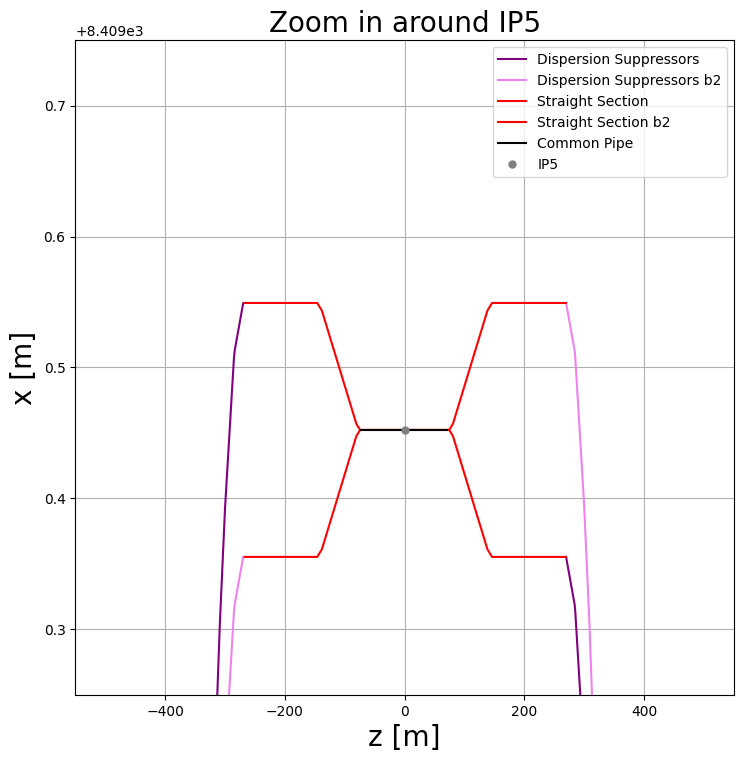

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8.5, 8.5)
fontsize = 20
ii = 'r5'
ax.plot(survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['Z'],
        -survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['X'],
        color='purple', label='Dispersion Suppressors')
ax.plot(survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['Z'],
        -survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['X'],
        color='violet', label='Dispersion Suppressors b2')
ii = 'l5'
ax.plot(survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['Z'],
        -survey_b1.rows['s.ds.'+ii+'.b1':'e.ds.'+ii+'.b1', ]['X'],
        color='purple')
ax.plot(survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['Z'],
        -survey_b2.rows['s.ds.'+ii+'.b2':'e.ds.'+ii+'.b2', ]['X'],
        color='violet')
ax.plot(survey_b1.rows['s.ds.'+'l5'+'.b1':'ip5', ]['Z'][310:],
        -survey_b1.rows['s.ds.'+'l5'+'.b1':'ip5', ]['X'][310:],
        color='red')
ax.plot(survey_b1.rows['ip5':'e.ds.'+'r5'+'.b1', ]['Z'][:230],
        -survey_b1.rows['ip5':'e.ds.'+'r5'+'.b1', ]['X'][:230],
        color='red', label='Straight Section')

ax.plot(survey_b2.rows['ip5':'e.ds.'+'r5'+'.b2', ]['Z'][:230],
        -survey_b2.rows['ip5':'e.ds.'+'r5'+'.b2', ]['X'][:230],
        color='red', label='Straight Section b2')
ax.plot(survey_b2.rows['ip5':'e.ds.'+'r5'+'.b2', ]['Z'][:75],
        -survey_b2.rows['ip5':'e.ds.'+'r5'+'.b2', ]['X'][:75],
        color='k', label='Common Pipe')

ax.plot(survey_b2.rows['s.ds.'+'l5'+'.b2':'ip5', ]['Z'][310:],
        -survey_b2.rows['s.ds.'+'l5'+'.b2':'ip5', ]['X'][310:],
        color='red')
ax.plot(survey_b2.rows['s.ds.'+'l5'+'.b2':'ip5', ]['Z'][495:],
        -survey_b2.rows['s.ds.'+'l5'+'.b2':'ip5', ]['X'][495:],
        color='k')
ax.plot(survey_b2.rows['ip5']['Z'], -survey_b2.rows['ip5']['X'], 'o', markersize=5, color='grey', label='IP5')
plt.title('Zoom in around IP5', fontsize = fontsize)
plt.legend()
plt.xlabel('z [m]', fontsize = fontsize)
plt.ylabel('x [m]', fontsize = fontsize)
plt.xlim(-550,550)
plt.ylim(8409.25,8409.75)
plt.grid()

Now we can calculate the distance between the two beams at each IP.
We can see that the distance is zero at the interaction points and it's greater than zero at the other IPs.

/tmp/ipykernel_2484/2660026162.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positions_b1[ips.index(ii),0] = survey_b1.rows[ii]['Z']
/tmp/ipykernel_2484/2660026162.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positions_b1[ips.index(ii),1] = survey_b1.rows[ii]['X']
/tmp/ipykernel_2484/2660026162.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  positions_b2[ips.index(ii),0] = survey_b2.rows[ii]['Z']
/tmp/ipykernel_2484/2660026162.py:11: DeprecationWa

ip1 0.0
ip2 1.549855910235809e-07
ip3 0.22392020221977896
ip4 0.4199998478879166
ip5 3.9615919421874574e-07
ip6 0.1939997244750952
ip7 0.22399985763423852
ip8 1.5434505261228888e-07


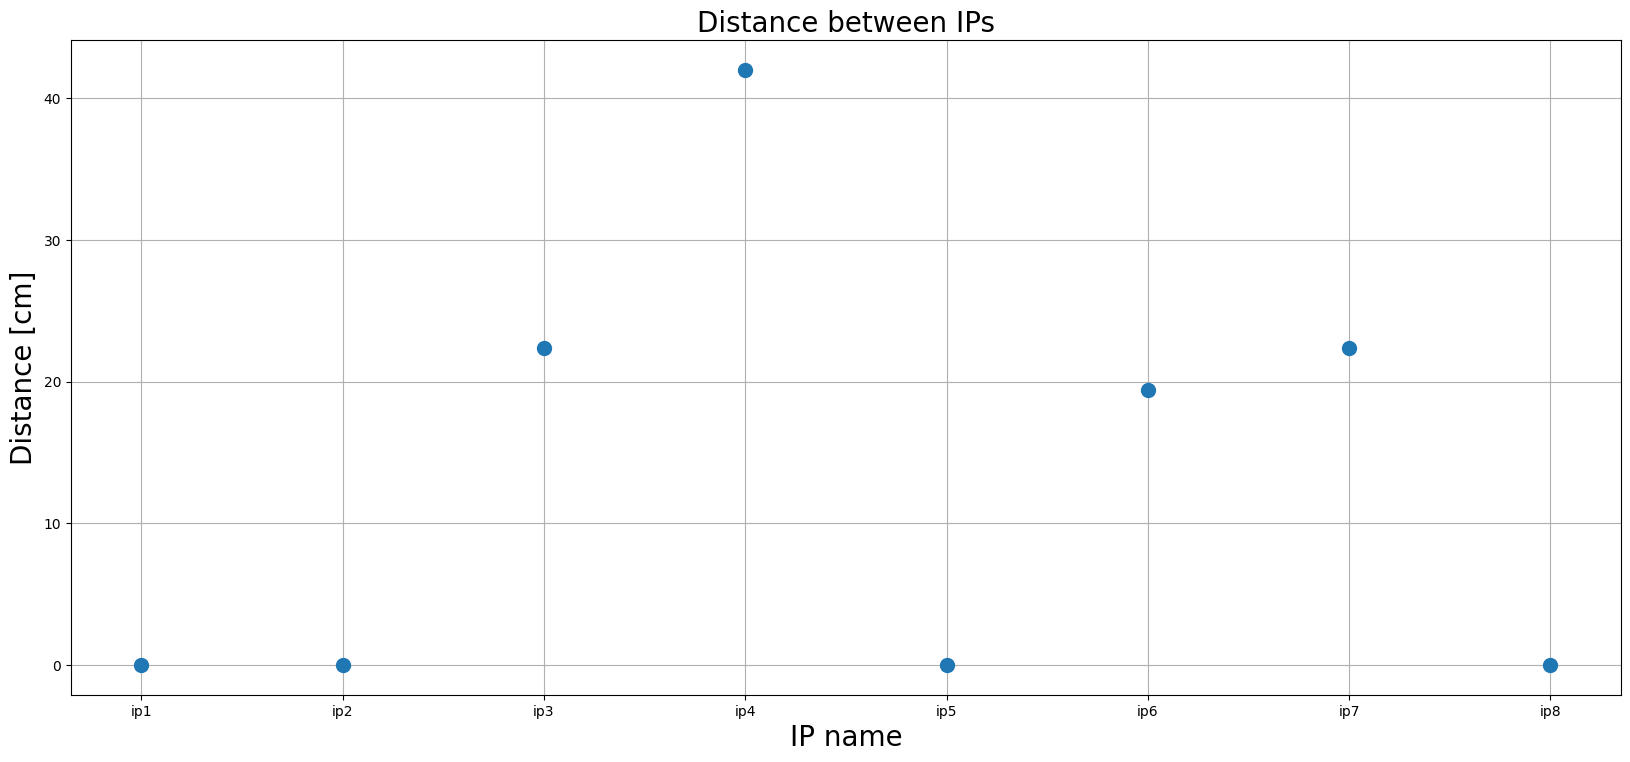

In [7]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 8.5)
fontsize = 20
ips =['ip1','ip2','ip3','ip4','ip5','ip6','ip7','ip8']
positions_b1 = np.zeros((len(ips),2))
positions_b2 = np.zeros((len(ips),2))
for ii in ips:
        positions_b1[ips.index(ii),0] = survey_b1.rows[ii]['Z']
        positions_b1[ips.index(ii),1] = survey_b1.rows[ii]['X']
        positions_b2[ips.index(ii),0] = survey_b2.rows[ii]['Z']
        positions_b2[ips.index(ii),1] = survey_b2.rows[ii]['X']
distances = []
for ii in range(len(ips)):
        print(ips[ii],np.sqrt((positions_b1[ii,0]-positions_b2[ii,0])**2+(positions_b1[ii,1]-positions_b2[ii,1])**2))
        distances.append(np.sqrt((positions_b1[ii,0]-positions_b2[ii,0])**2+(positions_b1[ii,1]-positions_b2[ii,1])**2)*100)
ax.plot(ips,distances,'o',markersize=10)
plt.title('Distance between IPs', fontsize = fontsize)
plt.xlabel('IP name', fontsize = fontsize)
plt.ylabel('Distance [cm]', fontsize = fontsize)
plt.grid()